<a href="https://colab.research.google.com/github/abelranni/modelos-de-simulacion/blob/main/ejercicios-resueltos/02.02E_bondad_de_ajuste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

### Ejemplo de pueba de bondad de ajuste
Supongamos que tenemos los siguientes datos de 50 estudiantes y sus calificaciones en un examen

In [ ]:
datos = [76, 81, 88, 85, 92, 88, 78, 84, 90, 85,         
         88, 95, 89, 94, 92, 87, 84, 82, 81, 97,         
         83, 89, 87, 91, 92, 90, 77, 85, 84, 93,         
         79, 90, 92, 84, 89, 91, 83, 86, 88, 91,         
         82, 87, 84, 89, 91, 95, 90, 86, 90, 85]

Queremos determinar si estos datos se ajustan a una distribución normal. 
A continuación, se describen los pasos para aplicar la prueba chi-cuadrado:

- Agrupar los datos observados en intervalos o categorías. 
- Por simplicidad, utilizaremos 5 intervalos de igual tamaño. 
- Se puede utilizar la función numpy.histogram para agrupar los datos y contar las frecuencias observadas en cada intervalo.

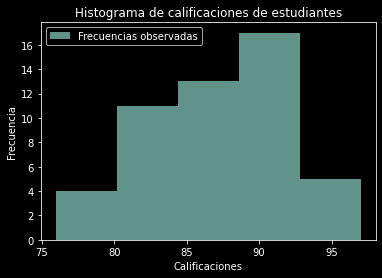

In [ ]:
# frecuencias_observadas, bordes_intervalos = np.histogram(datos, bins=5)
frecuencias_observadas, bordes_intervalos, _ = plt.hist(datos, bins=5, alpha=0.7, label='Frecuencias observadas')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.title('Histograma de calificaciones de estudiantes')
plt.legend()
plt.show()


- Calcular las frecuencias esperadas para cada intervalo utilizando la distribución de probabilidad propuesta. 
- En este caso, utilizaremos la distribución normal con la media y la desviación estándar estimadas a partir de los datos. 
- La función stats.norm.cdf de SciPy se puede utilizar para calcular la CDF en los bordes de los intervalos y, posteriormente, calcular las frecuencias esperadas.

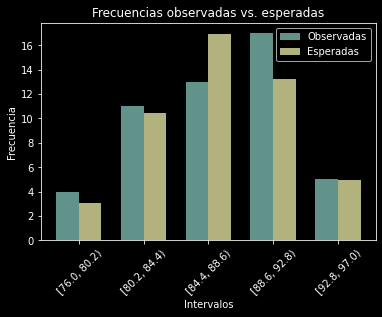

In [ ]:
mu = np.mean(datos)
sigma = np.std(datos)

cdf_bordes = stats.norm.cdf(bordes_intervalos, mu, sigma)
frecuencias_esperadas = np.diff(cdf_bordes) * len(datos)

# Crear el gráfico de barras para las frecuencias observadas y esperadas
etiquetas_intervalos = [(bordes_intervalos[i], bordes_intervalos[i + 1]) for i in range(len(bordes_intervalos) - 1)]

fig, ax = plt.subplots()
ancho_barra = 0.35

# Barras para las frecuencias observadas
posicion_barras_obs = np.arange(len(etiquetas_intervalos))
ax.bar(posicion_barras_obs - ancho_barra / 2, frecuencias_observadas, ancho_barra, label='Observadas', alpha=0.7)

# Barras para las frecuencias esperadas
posicion_barras_esp = np.arange(len(etiquetas_intervalos))
ax.bar(posicion_barras_esp + ancho_barra / 2, frecuencias_esperadas, ancho_barra, label='Esperadas', alpha=0.7)

ax.set_xlabel('Intervalos')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencias observadas vs. esperadas')
ax.set_xticks(posicion_barras_obs)
ax.set_xticklabels([f'[{a:.1f}, {b:.1f})' for a, b in etiquetas_intervalos], rotation=45)
ax.legend()

plt.show()


-Calcular la estadística chi-cuadrado: $$ \chi^2 = \sum \frac{(O - E)^2}{E} $$  

In [ ]:
chi_cuadrado = np.sum((frecuencias_observadas - frecuencias_esperadas) ** 2 / frecuencias_esperadas)

- Determinar el valor crítico de chi-cuadrado para un nivel de significancia dado (por ejemplo, 0.05) y los grados de libertad (número de intervalos menos 1).
- Como se están estimando parámetros de la distribución propuesta, se debe restar la cantidad de parámetros estimados al calcular los grados de libertad. 
- En el caso de la distribución normal, se están estimando dos parámetros: 
  - la media (mu) 
  - la desviación estándar (sigma)
- Por lo tanto, la fórmula para calcular los grados de libertad se modificaría de la siguiente manera:

```python	
grados_libertad = len(frecuencias_observadas) - 1 - 2
```
En este caso, restamos 1 por la partición de los datos en intervalos y 2 por los dos parámetros estimados de la distribución normal (mu y sigma).

In [ ]:
alpha = 0.05
grados_libertad = len(frecuencias_observadas) - 1 - 2
valor_critico = stats.chi2.ppf(1 - alpha, grados_libertad)

- Comparar la estadística chi-cuadrado calculada con el valor crítico. 
- Si la estadística chi-cuadrado es mayor que el valor crítico, rechazar la hipótesis nula y concluir que la distribución propuesta no se ajusta adecuadamente a los datos observados.

In [ ]:
if chi_cuadrado > valor_critico:
    print("Rechazar la hipótesis nula. La distribución normal no se ajusta a los datos")
else:
    print("No se puede rechazar la hipótesis nula. La distribución normal se ajusta a los datos")

No se puede rechazar la hipótesis nula. La distribución normal se ajusta a los datos
